In [63]:
! pip install -U pip
! pip install -U matplotlib
! pip install -U numpy
! pip install -U scipy

In [64]:
import numpy as np
import math
import scipy
from matplotlib import pyplot as plt
from scipy.fft import fftfreq, fft, fftshift
from typing import Callable
from random import randint

In [65]:
def plot(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

### Дискретное преобразованеи Фурье (Реализация на numpy)


In [103]:
def y_1(x):
    return math.sin(2*x*math.pi)

In [104]:
def discrete_get_values(
    func: Callable,
    discrete_range: np.ndarray,
) -> np.ndarray:
    result = np.zeros(discrete_range.shape)
    max_value = discrete_range.size
    for idx, value in enumerate(discrete_range):
        result[idx] = func((value) / max_value)
    return result

In [156]:
def discrete_fourier_transform(
    array: np.ndarray,
    k: int
) -> np.imag:
    def count_values(item, n):
        return item * math.e ** (
            (-1) * ((2 * math.pi * k * n * 1j) /
                    array.size - 1)
        )

    result = np.zeros(array.size, dtype=np.complex_)
    for idx in range(array.size):
        result[idx] = count_values(array[idx], idx)
    return np.sum(result)

In [157]:
def count_discrete_fourier_on(
    array: np.ndarray,
) -> np.ndarray:
    result = np.zeros(array.shape, dtype=np.complex_)
    for idx in range(array.size):
        result[idx] = discrete_fourier_transform(array, idx)
    return result

In [165]:
def reverse_fourier_transform(
    array: np.ndarray
) -> np.array:
    result = np.zeros(array.shape, dtype=np.complex_)
    for idx in range(array.size):
        result[idx] = (1 / len(array)) * \
            (discrete_fourier_transform(array, (-1) * idx))
    return result

[ 0.00000000e+00  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  1.22464680e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.07106781e-01 -5.55570233e-01 -3.82683432e-01 -1.95090322e-01]


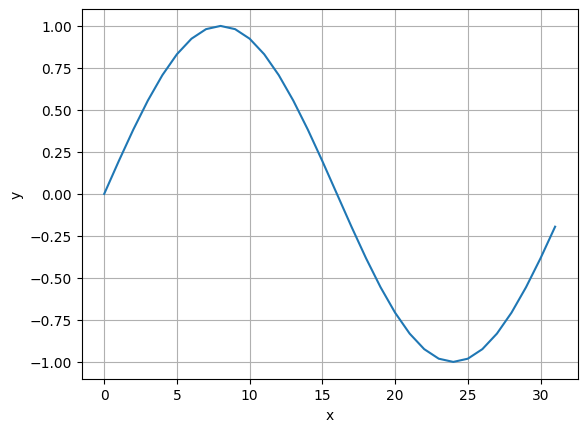

In [166]:
DISCRETE_COUNT_MAX = 32
discrete_range = np.arange(stop=DISCRETE_COUNT_MAX)
discrete_values = discrete_get_values(y_1, discrete_range)
print(discrete_values)
plot(discrete_range, discrete_values)

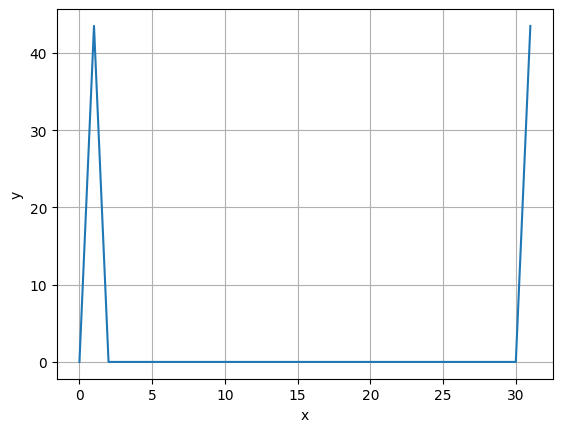

In [167]:
fourier_array = count_discrete_fourier_on(discrete_values)
plot(discrete_range, np.abs(fourier_array))

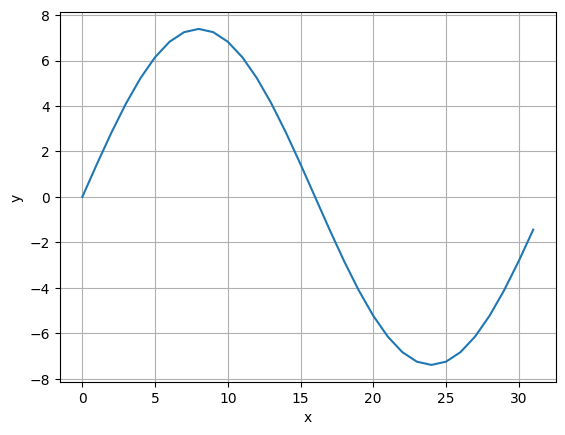

In [168]:
reversed_fourier_array = reverse_fourier_transform(fourier_array)
plot(discrete_range, reversed_fourier_array)

### Реализация Фурье на SciPy


In [111]:
def y_2(x):
    return np.sin(2 * math.pi * 50 * x) + np.sin(2 * math.pi * 120 * x) + (randint(0, 100) / 1000)

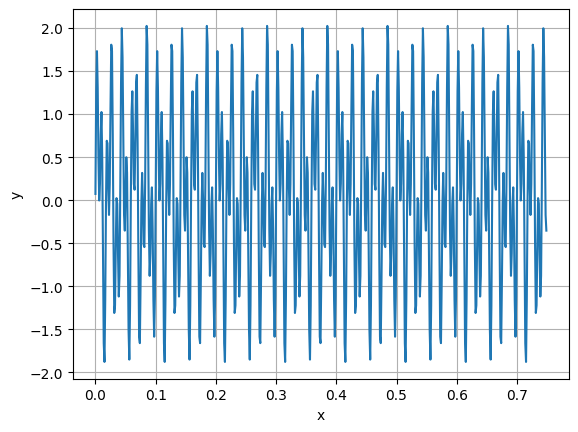

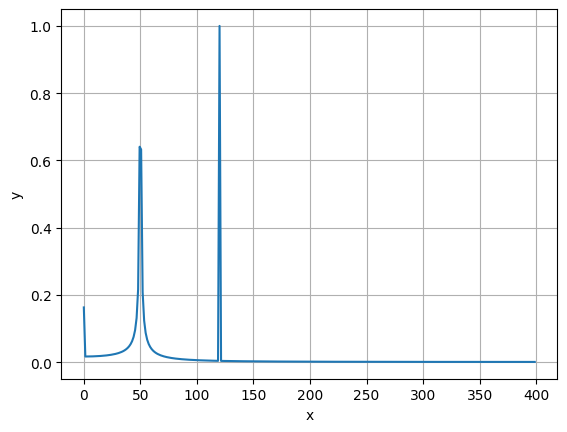

In [169]:
SIGNAL_POINTS = 600
SAMPLE_SPACING = 1.0 / 800
x = np.arange(0.0, stop=SIGNAL_POINTS*SAMPLE_SPACING, step=SAMPLE_SPACING)
y = y_2(x)
plot(x, y)
yf = fft(y)
xf = fftfreq(SIGNAL_POINTS, SAMPLE_SPACING)[:SIGNAL_POINTS//2]
plot(xf, 2.0/SIGNAL_POINTS * np.abs(yf[0:SIGNAL_POINTS//2]))